In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, f1_score, precision_score, roc_curve
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier, LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train_LZdllcl.csv")
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


[]

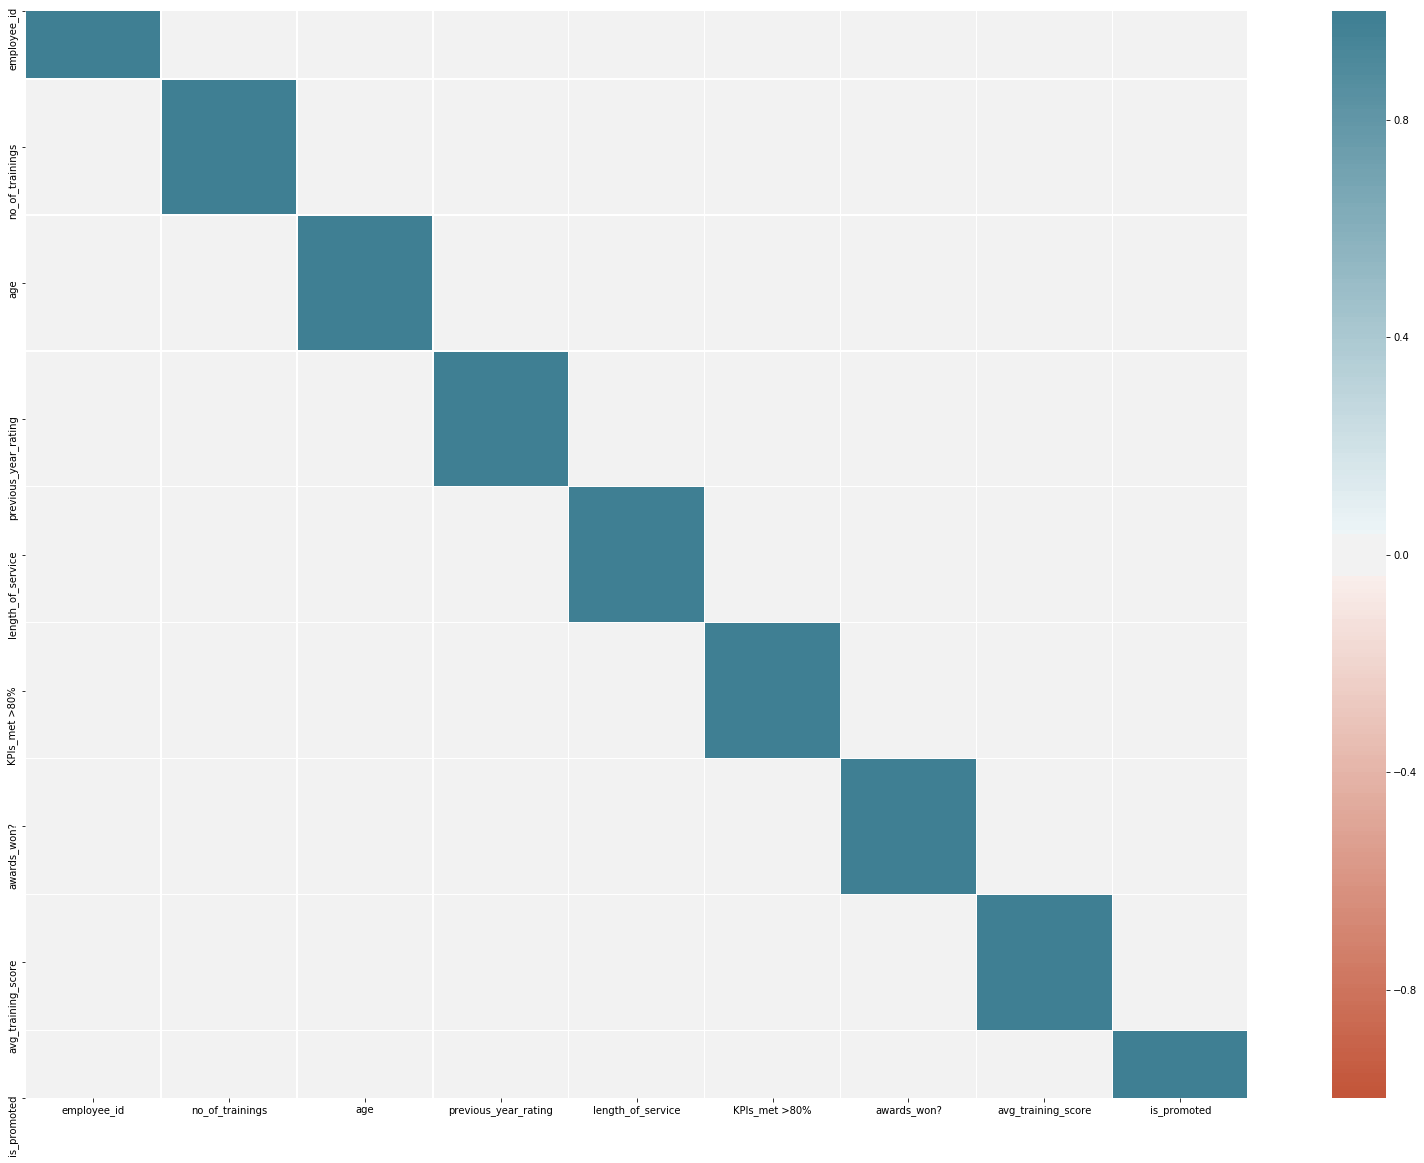

In [190]:
corr = data.corr()
plt.figure(figsize=(30,20))
ax = sns.heatmap(
    corr>0.8, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [191]:
gle = LabelEncoder()
department_dummies = gle.fit_transform(data['department'])
department_df = pd.DataFrame(department_dummies, columns = ['department_df'])
department_df

,department_df
0,7
1,4
2,7
3,7
4,8
5,0
6,4
7,4
8,0
9,7


In [192]:
gender_dummies = gle.fit_transform(data['gender'])
gender_df = pd.DataFrame(gender_dummies, columns = ['gender_df'])
gender_df

,gender_df
0,0
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


In [193]:
data.education.unique()
data['education'] = data['education'].map({'Below Secondary':2, "Bachelor's":3, "Master's & above":4,
       'No Qualification':0})
data.education.fillna(5, inplace=True)

In [194]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [195]:
X = data.drop(['employee_id', 'department', 'region', 'gender', 'recruitment_channel', 'is_promoted'], axis=1)
X = pd.concat([X, department_df, gender_df], axis=1)
X['previous_year_rating'] = X['previous_year_rating'].fillna(X['previous_year_rating'].median())
X

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_df,gender_df
0,4.0,1,35,5.0,8,1,0,49,7,0
1,3.0,1,30,5.0,4,0,0,60,4,1
2,3.0,1,34,3.0,7,0,0,50,7,1
3,3.0,2,39,1.0,10,0,0,50,7,1
4,3.0,1,45,3.0,2,0,0,73,8,1
5,3.0,2,31,3.0,7,0,0,85,0,1
6,3.0,1,31,3.0,5,0,0,59,4,0
7,4.0,1,33,3.0,6,0,0,63,4,1
8,3.0,1,28,4.0,5,0,0,83,0,1
9,4.0,1,32,5.0,5,1,0,54,7,1


In [196]:
y = data.is_promoted
y = pd.DataFrame(y, columns = ['is_promoted'])
y

,is_promoted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [197]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)

In [198]:
model = RandomForestClassifier()
model.fit(X_valid, y_valid)
y_pred = model.predict(X_valid)
f1_score(y_valid, y_pred)

0.9824689554419285

In [199]:
data_test = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\test_2umaH9m.csv")
data_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [200]:
gle = LabelEncoder()
departmentt_dummies = gle.fit_transform(data_test['department'])
departmentt_df = pd.DataFrame(departmentt_dummies, columns = ['departmentt_df'])
departmentt_df

,departmentt_df
0,8
1,2
2,7
3,5
4,1
5,5
6,1
7,0
8,8
9,8


In [201]:
gendert_dummies = gle.fit_transform(data_test['gender'])
gendert_df = pd.DataFrame(gendert_dummies, columns = ['gendert_df'])
gendert_df

,gendert_df
0,1
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [202]:
data_test.education.unique()
data_test['education'] = data_test['education'].map({'Below Secondary':2, "Bachelor's":3, "Master's & above":4,
       'No Qualification':0})
data_test.education.fillna(5, inplace=True)

In [203]:
X_test = data_test.drop(['employee_id', 'department', 'region', 'gender', 'recruitment_channel'], axis=1)
X_test = pd.concat([X_test, departmentt_df, gendert_df], axis=1)
X_test['previous_year_rating'] = X_test['previous_year_rating'].fillna(X_test['previous_year_rating'].median())
X_test

education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
departmentt_df          0
gendert_df              0
dtype: int64

In [205]:
predictions = model.predict(X_test)
predictions
subm = pd.DataFrame(predictions, columns = ['is_promoted'])
subm.to_csv('submission.csv', index=False)
subm

,is_promoted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1
